# Assignment No.6


#### Utilize the K-Means clustering algorithm to segment customers based on their purchasing 
#### behavior. Apply the Elbow Method to determine the optimal number of clusters that best 
#### represent distinct customer segments for targeted marketing strategies. Dataset: UCI Machine 
#### Learning Repository - Wholesale Customers Data Set  

#### Name: Wavhal Prathmesh Navnath 
#### Roll No:23107137
#### Class :  TY-B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/prath/Downloads/Wholesale customers data.csv")

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df = df.drop(columns=["Channel","Region"],axis=1)

In [5]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [6]:
## Standardization = feature scaling technique

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [7]:
x =df

## Outlier Detection using IQR

In [8]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Find outlier rows
outlier_condition = ((x< (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)
outliers = df[outlier_condition]

print(f"Number of outliers: {len(outliers)}")
print(outliers)

Number of outliers: 108
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
2     6353   8808     7684    2405              3516        7844
4    22615   5410     7198    3915              1777        5185
17    5876   6157     2933     839               370        4478
22   31276   1917     4469    9408              2381        4334
23   26373  36423    22019    5154              4337       16523
..     ...    ...      ...     ...               ...         ...
427  31012  16687     5429   15082               439        1163
431   8533   5506     5160   13486              1377        1498
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867

[108 rows x 6 columns]


In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x = scaler.fit_transform(x)


In [10]:
x = scalar.fit_transform(x)

In [11]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

### Elbow Method to select K-Value

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[2640.0,
 1985.8310672356574,
 1619.952782172456,
 1317.8973573404485,
 1070.2551995135616,
 925.5621320487785,
 853.7550323759655,
 794.1649663000028,
 672.5116366417119,
 638.6802117739219]

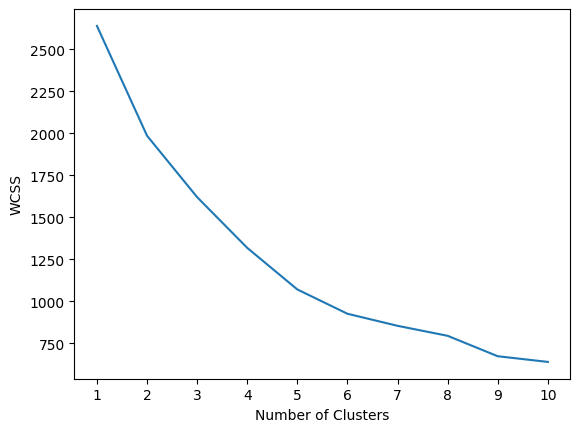

In [15]:
## plot the ELBOW Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [31]:
model = KMeans(n_clusters=3, random_state=42, n_init=10)

In [32]:
model.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [33]:
clusters= model.fit_predict(x)

In [34]:
df['Cluster'] = clusters

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

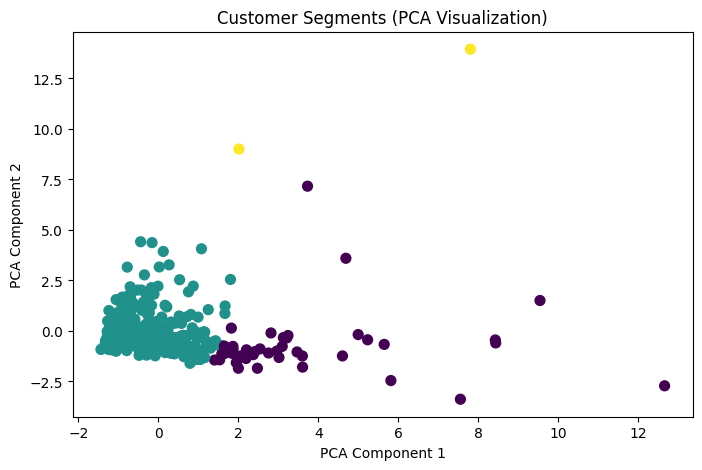

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Validating k-value diff Method
## kneelocator

In [38]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [39]:
kl.elbow

5

## Sillihoute Scoring

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
sillhoute_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x)
    score = silhouette_score(x,kmeans.labels_)
    sillhoute_coef.append(score)

In [42]:
sillhoute_coef

[0.5532526964184259,
 0.5323210929297174,
 0.36232371550681225,
 0.2699786894327585,
 0.3758033637245776,
 0.3356008212733988,
 0.29709019883625454,
 0.2972001998245971,
 0.32040877415020924]

In [43]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(x)
    score = silhouette_score(x, clusters)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

k = 2, Silhouette Score = 0.400
k = 3, Silhouette Score = 0.458
k = 4, Silhouette Score = 0.349
k = 5, Silhouette Score = 0.369
k = 6, Silhouette Score = 0.276
k = 7, Silhouette Score = 0.277
k = 8, Silhouette Score = 0.324
k = 9, Silhouette Score = 0.295
k = 10, Silhouette Score = 0.229


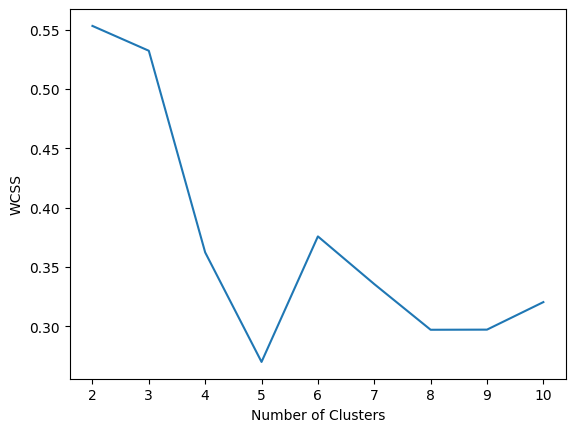

In [44]:
## plot the ELBOW Curve
plt.plot(range(2,11),sillhoute_coef)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()           ## choose the max value in graph        ## i.e. is 5.

In [46]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(x, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.22876866444760022


In [47]:
cluster_summary = df.groupby('Cluster')[df.columns].mean()
print(cluster_summary)

                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        10440.933333  19386.422222  28656.088889   2190.244444   
1        12062.913486   4115.099237   5534.966921   2940.676845   
2        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  Cluster  
Cluster                                           
0            13327.800000   2374.200000      0.0  
1             1696.170483   1299.114504      1.0  
2              755.500000  26776.000000      2.0  


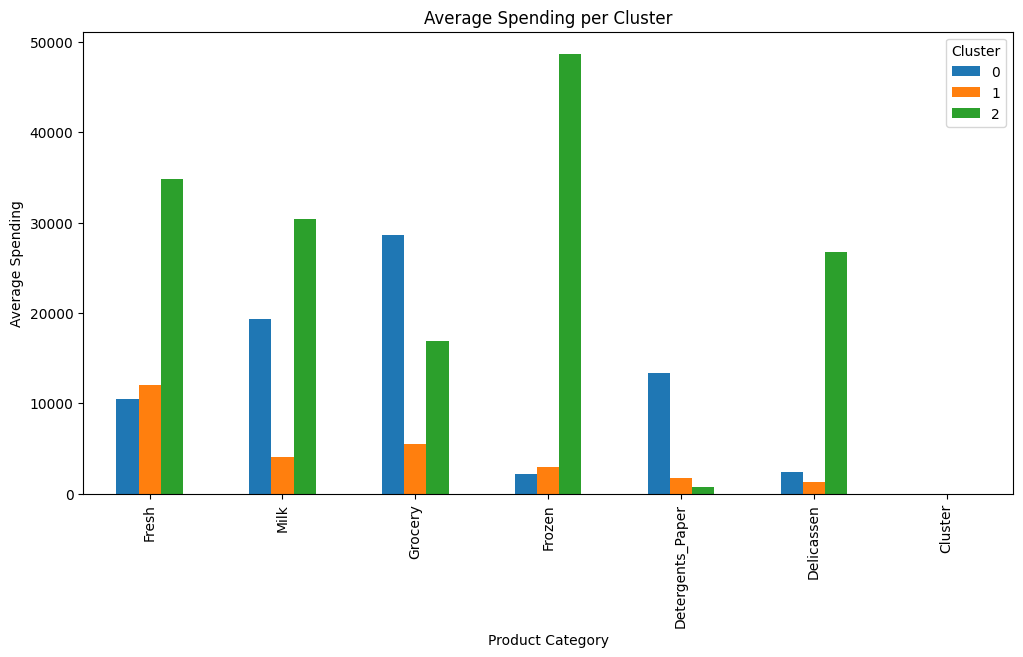

In [48]:
cluster_summary[df.columns].T.plot(kind='bar', figsize=(12,6))
plt.title("Average Spending per Cluster")
plt.xlabel("Product Category")
plt.ylabel("Average Spending")
plt.show()
